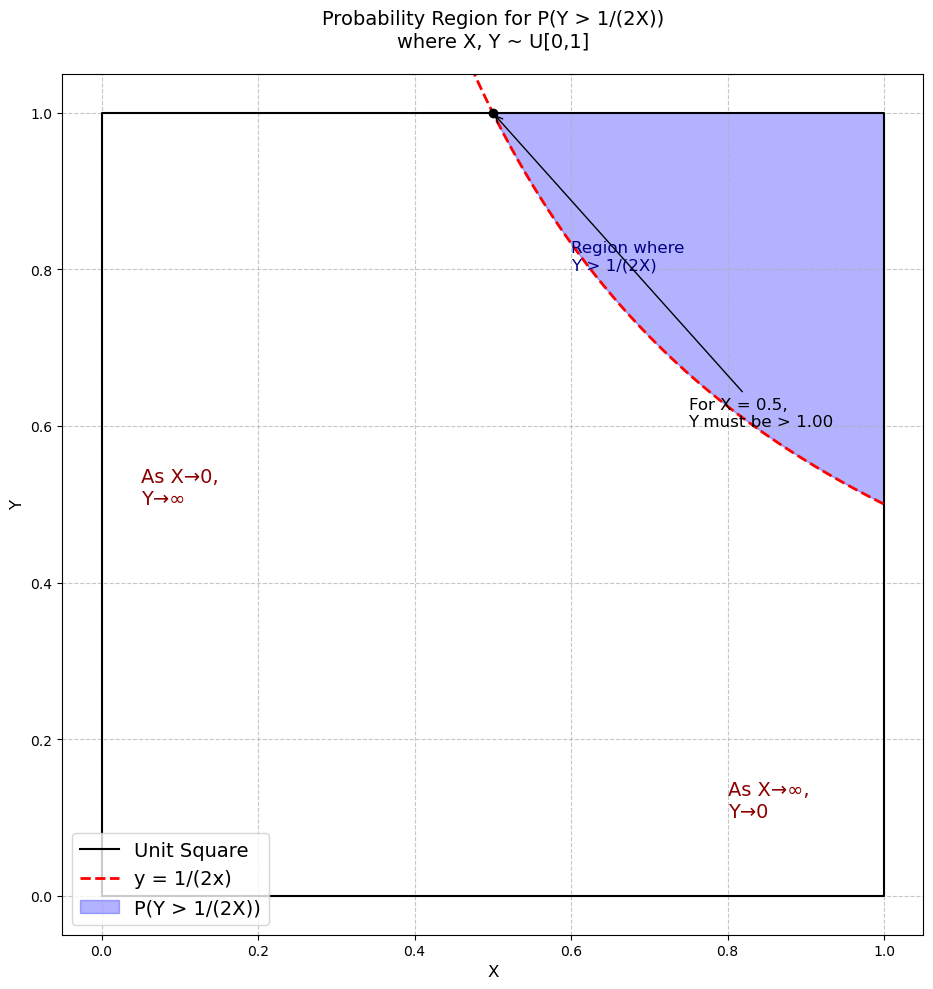

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


# Create figure and axis with specific size
fig, ax = plt.subplots(figsize=(10, 10))

# Create data for the boundary curve y = 1/(2x)
x = np.linspace(0.01, 1, 1000)  # Avoid x=0 due to division
y = 1 / (2*x)

# Plot the unit square boundary
ax.plot([0, 1, 1, 0, 0], [0, 0, 1, 1, 0], 'k-', linewidth=1.5, label='Unit Square')

# Plot the boundary curve y = 1/(2x)
ax.plot(x, y, 'r--', linewidth=2, label='y = 1/(2x)')

# Create the shaded region for y > 1/(2x)
x_region = x[y <= 1]  # Only include points where y ≤ 1 (within unit square)
y_boundary = np.minimum(y, np.ones_like(x))  # Clip y values at 1
x_fill = np.concatenate([x_region, [x_region[-1], x_region[0]]])
y_fill = np.concatenate([y_boundary[y <= 1], [1, 1]])
polygon = Polygon(np.column_stack((x_fill, y_fill)), 
                 alpha=0.3, 
                 color='blue',
                 label='P(Y > 1/(2X))')

ax.add_patch(polygon)

# Add grid
ax.grid(True, linestyle='--', alpha=0.7)

# Set axis labels and title
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_title('Probability Region for P(Y > 1/(2X))\nwhere X, Y ~ U[0,1]', 
             fontsize=14, 
             pad=20)

# Set axis limits with some padding
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)

# Add legend
ax.legend(loc='lower left', fontsize=14)

# Add annotations to explain the regions
ax.annotate('Region where\nY > 1/(2X)', 
           xy=(0.75, 0.8),
           xytext=(0.6, 0.8),
           fontsize=12,
           color='navy')

# Add example point and annotation
example_x = 0.5
example_y = 1/(2*example_x)
ax.plot([example_x], [example_y], 'ko')
ax.annotate(f'For X = 0.5,\nY must be > {example_y:.2f}',
           xy=(example_x, example_y),
           xytext=(0.75, 0.6),
           fontsize=12,
           arrowprops=dict(arrowstyle='->'))

# Add text explaining the asymptotic behavior
ax.text(0.05, 0.5, 'As X→0,\nY→∞', fontsize=14, color='darkred')
ax.text(0.8, 0.1, 'As X→∞,\nY→0', fontsize=14, color='darkred')

# Make sure plot displays with equal aspect ratio
ax.set_aspect('equal')

# Adjust layout to prevent text cutoff
plt.tight_layout()

# Show the plot
plt.show()